In [342]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler

In [343]:
data = pd.read_csv('./data/Melbourne_housing_FULL.csv')
data

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,...,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,...,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34852,Yarraville,13 Burns St,4,h,1480000.0,PI,Jas,24/02/2018,6.3,3013.0,...,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
34853,Yarraville,29A Murray St,2,h,888000.0,SP,Sweeney,24/02/2018,6.3,3013.0,...,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
34854,Yarraville,147A Severn St,2,t,705000.0,S,Jas,24/02/2018,6.3,3013.0,...,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0
34855,Yarraville,12/37 Stephen St,3,h,1140000.0,SP,hockingstuart,24/02/2018,6.3,3013.0,...,NaN,NaN,NaN,NaN,NaN,Maribyrnong City Council,NaN,NaN,Western Metropolitan,6543.0


## Data cleaning

In [344]:
data.isna().sum(axis=0)

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7610
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

We see some missing data in the target and position features (Long/Lat). Filling with mean/mode can affect model performance on new real data.
Instead, just drop data-entries with unkown target values.

In [345]:
data.dropna(subset=['Price', 'Longtitude', 'Lattitude'], axis=0, inplace=True)
data.drop(['Method', 'Date', 'SellerG', 'Postcode'], axis=1, inplace=True)

data.reset_index(inplace=True, drop=True)
data

,Suburb,Address,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,2.5,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,2.5,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,2.5,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,2.5,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.79690,144.99690,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,2.5,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.80720,144.99410,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20988,Yarraville,78 Bayview Rd,3,h,1101000.0,6.3,3.0,1.0,NaN,288.0,NaN,NaN,Maribyrnong City Council,-37.81095,144.88516,Western Metropolitan,6543.0
20989,Yarraville,13 Burns St,4,h,1480000.0,6.3,4.0,1.0,3.0,593.0,NaN,NaN,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0
20990,Yarraville,29A Murray St,2,h,888000.0,6.3,2.0,2.0,1.0,98.0,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0
20991,Yarraville,147A Severn St,2,t,705000.0,6.3,2.0,1.0,2.0,220.0,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0


In [346]:
geo_features = ['Lattitude', 'Longtitude', 'CouncilArea', 'Address', 'Suburb']
position_data = data[geo_features]
data.drop(geo_features, axis=1, inplace=True)

In [347]:
cat_feat = [f for f in data.columns if data.dtypes[f] == 'object']
num_feat = [f for f in data.columns if f not in cat_feat]

for f in cat_feat:
    data[f] = data[f].fillna(method='ffill')
    
for f in num_feat:
    data[f] = data[f].fillna(data[f].mean())

In [348]:
data.isna().sum(axis=0)

Rooms            0
Type             0
Price            0
Distance         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
Regionname       0
Propertycount    0
dtype: int64

## Data preprocessing

For feature "YearBuilt" - apply segmentation into bins

In [349]:
# data['YearBuilt'] = pd.cut(data['YearBuilt'], bins=20, labels=range(20))

(array([1.4109e+04, 5.8390e+03, 8.2400e+02, 1.5400e+02, 4.8000e+01,
        1.4000e+01, 2.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00]),
 array([   85000.,  1196500.,  2308000.,  3419500.,  4531000.,  5642500.,
         6754000.,  7865500.,  8977000., 10088500., 11200000.]),
 <BarContainer object of 10 artists>)

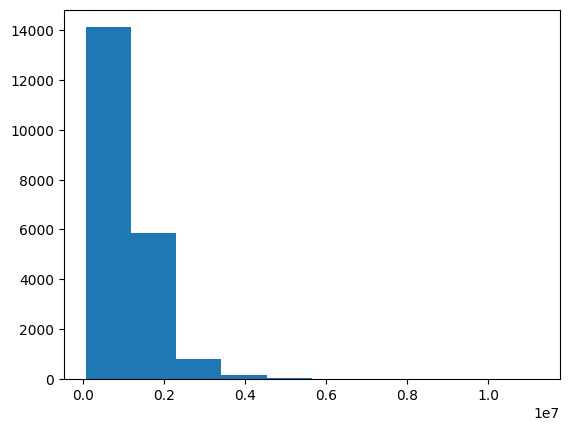

In [350]:
import matplotlib.pyplot as plt

plt.hist(data['Price'])

Traget column [Price] contains dangerous outliers, which may negatively affect model training.
Because of that, we remove everything beyond the 3*σ range (including other numerical features).

------> 1.1450896464233793


(array([ 568., 4587., 5441., 3258., 2388., 1338.,  695.,  454.,  236.,
         165.]),
 array([  85000.,  380500.,  676000.,  971500., 1267000., 1562500.,
        1858000., 2153500., 2449000., 2744500., 3040000.]),
 <BarContainer object of 10 artists>)

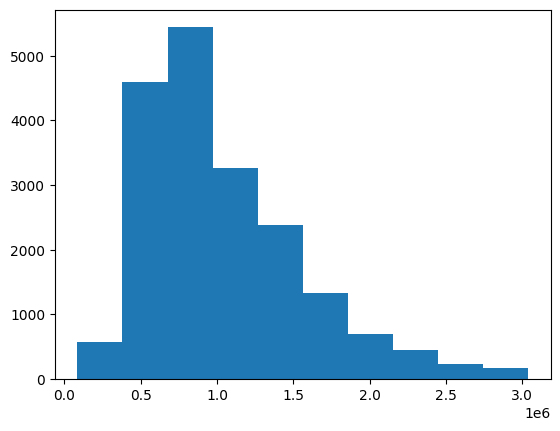

In [351]:
from scipy import stats

num_data = data[num_feat]
# target = np.log(num_data["Price"])
# data.drop(columns=["Price"])

data = data[(np.abs(stats.zscore(num_data)) <= 3).all(axis=1)]
print("------>", target.skew())
plt.hist(data["Price"])

In [352]:
data

,Rooms,Type,Price,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount
0,2,h,1480000.0,2.5,2.0,1.0,1.000000,202.0,156.862153,1966.592001,Northern Metropolitan,4019.0
1,2,h,1035000.0,2.5,2.0,1.0,0.000000,156.0,79.000000,1900.000000,Northern Metropolitan,4019.0
2,3,h,1465000.0,2.5,3.0,2.0,0.000000,134.0,150.000000,1900.000000,Northern Metropolitan,4019.0
3,3,h,850000.0,2.5,3.0,2.0,1.000000,94.0,156.862153,1966.592001,Northern Metropolitan,4019.0
4,4,h,1600000.0,2.5,3.0,1.0,2.000000,120.0,142.000000,2014.000000,Northern Metropolitan,4019.0
...,...,...,...,...,...,...,...,...,...,...,...,...
20988,3,h,1101000.0,6.3,3.0,1.0,1.715259,288.0,156.862153,1966.592001,Western Metropolitan,6543.0
20989,4,h,1480000.0,6.3,4.0,1.0,3.000000,593.0,156.862153,1966.592001,Western Metropolitan,6543.0
20990,2,h,888000.0,6.3,2.0,2.0,1.000000,98.0,104.000000,2018.000000,Western Metropolitan,6543.0
20991,2,t,705000.0,6.3,2.0,1.0,2.000000,220.0,120.000000,2000.000000,Western Metropolitan,6543.0


In [353]:
position_data

,Lattitude,Longtitude,CouncilArea,Address,Suburb
0,-37.79960,144.99840,Yarra City Council,85 Turner St,Abbotsford
1,-37.80790,144.99340,Yarra City Council,25 Bloomburg St,Abbotsford
2,-37.80930,144.99440,Yarra City Council,5 Charles St,Abbotsford
3,-37.79690,144.99690,Yarra City Council,40 Federation La,Abbotsford
4,-37.80720,144.99410,Yarra City Council,55a Park St,Abbotsford
...,...,...,...,...,...
20988,-37.81095,144.88516,Maribyrnong City Council,78 Bayview Rd,Yarraville
20989,-37.81053,144.88467,Maribyrnong City Council,13 Burns St,Yarraville
20990,-37.81551,144.88826,Maribyrnong City Council,29A Murray St,Yarraville
20991,-37.82286,144.87856,Maribyrnong City Council,147A Severn St,Yarraville


In [354]:
print(geo_features)
position_data = position_data.iloc[data.index].reset_index(drop=True)
data.reset_index(drop=True, inplace=True)

['Lattitude', 'Longtitude', 'CouncilArea', 'Address', 'Suburb']


Standardize numerical features

In [355]:
target = data['Price']
data.drop('Price', axis=1, inplace=True)
num_feat.remove('Price')
std_scaler = RobustScaler()

data[num_feat] = std_scaler.fit_transform(data[num_feat])

data

,Rooms,Type,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Regionname,Propertycount
0,-0.5,h,-1.013158,-0.5,0.0,-1.000000,-0.931759,0.000000,0.000000,Northern Metropolitan,-0.446519
1,-0.5,h,-1.013158,-0.5,0.0,-2.000000,-1.052493,-2.898582,-7.920077,Northern Metropolitan,-0.446519
2,0.0,h,-1.013158,0.0,1.0,-2.000000,-1.110236,-0.255458,-7.920077,Northern Metropolitan,-0.446519
3,0.0,h,-1.013158,0.0,1.0,-1.000000,-1.215223,0.000000,0.000000,Northern Metropolitan,-0.446519
4,0.5,h,-1.013158,0.0,0.0,0.000000,-1.146982,-0.553275,5.638440,Northern Metropolitan,-0.446519
...,...,...,...,...,...,...,...,...,...,...,...
19125,0.0,h,-0.513158,0.0,0.0,-0.284741,-0.706037,0.000000,0.000000,Western Metropolitan,0.011059
19126,0.5,h,-0.513158,0.5,0.0,1.000000,0.094488,0.000000,0.000000,Western Metropolitan,0.011059
19127,-0.5,h,-0.513158,-0.5,1.0,-1.000000,-1.204724,-1.967905,6.114177,Western Metropolitan,0.011059
19128,-0.5,t,-0.513158,-0.5,0.0,0.000000,-0.884514,-1.372271,3.973359,Western Metropolitan,0.011059


One-hot encoding is applied to categorical features "Regionname" and "Type"

In [356]:
ohe = OneHotEncoder()

encoded_cat = ohe.fit_transform(data[cat_feat])
encoded_cat = pd.DataFrame(encoded_cat.todense())
data.drop(cat_feat, axis=1, inplace=True)

data = pd.concat([data, encoded_cat], axis=1)

In [357]:
print(data.shape)
data

(19130, 20)


,Rooms,Distance,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Propertycount,0,1,2,3,4,5,6,7,8,9,10
0,-0.5,-1.013158,-0.5,0.0,-1.000000,-0.931759,0.000000,0.000000,-0.446519,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,-0.5,-1.013158,-0.5,0.0,-2.000000,-1.052493,-2.898582,-7.920077,-0.446519,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.0,-1.013158,0.0,1.0,-2.000000,-1.110236,-0.255458,-7.920077,-0.446519,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,-1.013158,0.0,1.0,-1.000000,-1.215223,0.000000,0.000000,-0.446519,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,0.5,-1.013158,0.0,0.0,0.000000,-1.146982,-0.553275,5.638440,-0.446519,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19125,0.0,-0.513158,0.0,0.0,-0.284741,-0.706037,0.000000,0.000000,0.011059,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19126,0.5,-0.513158,0.5,0.0,1.000000,0.094488,0.000000,0.000000,0.011059,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19127,-0.5,-0.513158,-0.5,1.0,-1.000000,-1.204724,-1.967905,6.114177,0.011059,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19128,-0.5,-0.513158,-0.5,0.0,0.000000,-0.884514,-1.372271,3.973359,0.011059,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


### Building edge index

Generate edge index for our graph of real estate.<br>
Creates edge between two entities, if distance between them is under the predefined threshold

In [358]:
import os
import pickle
from graph_encoder import encode_edges

edge_index_file = "edge_index.pickle"
EDGE_CREATING_DISTANCE = 1

if os.path.exists(edge_index_file):
    with open(edge_index_file, 'rb') as f:
        edge_index = pickle.load(f)
else:
    position_data.rename(columns={'Lattitude': 'lat', 'Longtitude': 'long'}, inplace=True)
    edge_index = encode_edges(position_data, EDGE_CREATING_DISTANCE)
    
    with open(edge_index_file, "wb") as output:
        pickle.dump(edge_index, output)

1


In [359]:
import torch_geometric.utils as utils

# just ensuring the graph is undirected
undirected_edge_index = utils.to_undirected(edge_index)
print(undirected_edge_index.shape)

torch.Size([2, 1665312])


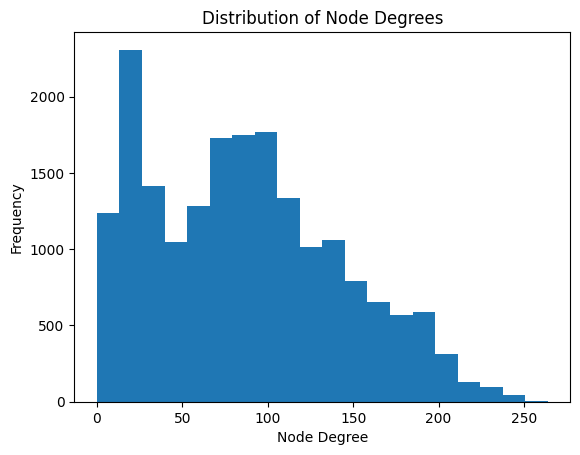

In [360]:
import torch_geometric.utils as utils
import matplotlib.pyplot as plt

degrees = utils.degree(edge_index[0])

degrees_np = np.array([int(deg) for deg in degrees])
plt.hist(degrees_np, bins=20)
plt.xlabel('Node Degree')
plt.ylabel('Frequency')
plt.title('Distribution of Node Degrees')
plt.show()

Create DataLoader which devides nodes into set of batches (for learning).<br>
Also, creates custom data-splitter for dividing data into train/val/test parts.

In [361]:
import torch
from torch_geometric.data import Data
from torch_geometric.loader import NeighborLoader
from torch_geometric.transforms import RandomNodeSplit

# use data where the target is log-transformed
data = Data(
    torch.tensor(data.to_numpy(), dtype=torch.float32),
    edge_index=edge_index,
    # y=torch.tensor(np.log(target.to_numpy()), dtype=torch.float32)
    y=torch.tensor(target.to_numpy(), dtype=torch.float32)
)
node_splitter = RandomNodeSplit(num_val=0.2, num_test=0.1)
graph = node_splitter(data)

data_loader = NeighborLoader(graph,
                             input_nodes=graph.train_mask,
                             batch_size=128,
                             num_neighbors=[20], 
                             shuffle=True,)

## Applying GNN

In [362]:
import torch
import torch.nn as nn
import torch_geometric.nn as nn_geom
from torch_geometric.data import Data

class Net(nn.Module):
    def __init__(self, input_size: int, hidden_layer: int):
        super().__init__()
        self.conv1 = nn_geom.SAGEConv(input_size, hidden_layer)
        self.conv2 = nn_geom.SAGEConv(hidden_layer, hidden_layer)

        # self.in_head = 4
        # self.out_head = 1

        # self.conv1 = nn_geom.GATConv(
        #     input_size, 
        #     hidden_layer, 
        #     heads=self.in_head,
        #     dropout=0.3)
        # self.conv2 = nn_geom.GATConv(
        #     self.in_head * hidden_layer,
        #     hidden_layer,
        #     heads=self.out_head,
        #     concat=False,
        #     dropout=0.3
        # )
        
        self.linear1 = nn.Linear(hidden_layer, hidden_layer)
        self.linear2 = nn.Linear(hidden_layer, hidden_layer)
        self.linear3 = nn.Linear(hidden_layer, 1)

    
    def forward(self, data: Data, edge_index: torch.Tensor) -> torch.Tensor:
        x = self.conv1(data, edge_index).relu()
        x = self.conv2(x, edge_index).relu()

        x = self.linear1(x).relu()
        x = self.linear2(x).relu()
        
        return self.linear3(x)

In [363]:
model = Net(graph.x.shape[1], 16)

loss_criteria = nn.MSELoss()
optim = torch.optim.Adam(model.parameters(), lr=0.01)

In [364]:
model

Net(
  (conv1): SAGEConv(20, 16, aggr=mean)
  (conv2): SAGEConv(16, 16, aggr=mean)
  (linear1): Linear(in_features=16, out_features=16, bias=True)
  (linear2): Linear(in_features=16, out_features=16, bias=True)
  (linear3): Linear(in_features=16, out_features=1, bias=True)
)

In [365]:
import math
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings(action='ignore')

n_epochs = 100
best_mse, best_weights = math.inf, None

for epoch in range(n_epochs):
    model.train()
    for batch in data_loader:
        optim.zero_grad()
        #import pdb; pdb.set_trace()
        out = model(batch.x, batch.edge_index)

        y = batch.y[:batch.batch_size] 
        out = out[:batch.batch_size]

        loss = loss_criteria(out, y)
        loss.backward()
        optim.step()
    
    model.eval()
    with torch.no_grad():
        predicts = model(graph.x, graph.edge_index)
        mse = loss_criteria(predicts[graph.val_mask], graph.y[graph.val_mask])
        r2 = r2_score(graph.y[graph.val_mask].detach(), predicts[graph.val_mask].detach())    
        print(f'Epoch #{epoch} | MSE_Loss = {mse:.4e} | R^2 = {r2}')
        
    if mse < best_mse:
        best_mse, best_weights = mse, model.state_dict()

Epoch #0 | MSE_Loss = 5.6519e+11 | R^2 = -1.5708879973711127
Epoch #1 | MSE_Loss = 3.4654e+11 | R^2 = -0.26774102877137995
Epoch #2 | MSE_Loss = 3.7822e+11 | R^2 = -0.3893070221891779
Epoch #3 | MSE_Loss = 3.4194e+11 | R^2 = -0.24924170516180433
Epoch #4 | MSE_Loss = 3.5560e+11 | R^2 = -0.3047463052267989
Epoch #5 | MSE_Loss = 3.4322e+11 | R^2 = -0.2494029805747633
Epoch #6 | MSE_Loss = 3.6257e+11 | R^2 = -0.32160625591742664
Epoch #7 | MSE_Loss = 3.8374e+11 | R^2 = -0.3925724389747063
Epoch #8 | MSE_Loss = 3.7211e+11 | R^2 = -0.3638681694955659
Epoch #9 | MSE_Loss = 3.7720e+11 | R^2 = -0.3716413115331745
Epoch #10 | MSE_Loss = 3.8201e+11 | R^2 = -0.3943771492262147
Epoch #11 | MSE_Loss = 3.2387e+11 | R^2 = -0.17079133619127274
Epoch #12 | MSE_Loss = 3.6394e+11 | R^2 = -0.32014760788339114
Epoch #13 | MSE_Loss = 3.8284e+11 | R^2 = -0.3950371489267992
Epoch #14 | MSE_Loss = 3.7962e+11 | R^2 = -0.37627893203401275
Epoch #15 | MSE_Loss = 3.7108e+11 | R^2 = -0.34748335698296184
Epoch #16 |

In [366]:
out

tensor([[ 994753.5625],
        [1000399.4375],
        [1018990.1875],
        [1000600.2500],
        [ 990589.6875],
        [ 999084.1250],
        [ 997379.0625],
        [ 995845.6875],
        [1010819.5625],
        [1014360.1875],
        [1011412.2500],
        [1010445.0625],
        [1003777.4375],
        [ 992017.4375],
        [1011230.0000],
        [1008027.8125],
        [1004624.2500],
        [1009027.7500],
        [ 998670.0625],
        [1008832.8125],
        [1004965.1875],
        [1001464.5000],
        [ 996861.1875],
        [ 999516.3125],
        [1005321.4375],
        [1008534.4375],
        [ 967279.9375],
        [1002956.5625],
        [ 998647.5625],
        [1002291.5000],
        [ 970759.8125],
        [1011343.7500],
        [ 998236.4375],
        [1008735.4375],
        [ 992842.6250],
        [ 992709.6250],
        [ 991876.3125],
        [1010924.6250],
        [1001233.8125],
        [1008251.3125],
        [ 998706.6875],
        [1008310

In [367]:
y

tensor([ 870000., 1010000.,  885000.,  591000.,  985000., 1250000.,  682000.,
         542000., 1045000., 1075000., 2070000., 2450000., 2360000.,  660000.,
         721000., 1013000., 1080000.,  779000.,  730000., 1470000.,  780000.,
        1770000., 1005000., 1206000.,  740600.,  981000.,  390000.,  975000.,
         510000., 1861000., 1000000., 1370000., 1875000., 1450000.,  765000.,
         368000.,  405000., 2320000.,  566000.,  845000.,  615000., 1000000.,
        2415000.,  517000.,  745000., 1200000., 1280000.,  780000.,  725000.,
        1250000., 1030000.,  679500., 1950000., 1165000.,  800000.,  465000.,
        1260000.,  400000.,  450000.,  370000., 2570000., 1595000.,  810000.,
        1160000., 1337500.,  710000.,  610000.,  420000., 1200000., 1507000.,
         975000., 2250000.,  800000.,  808000.,  537000., 1425000.,  660000.,
         422000., 1855000.])

In [368]:
model.conv1.lin

AttributeError: 'SAGEConv' object has no attribute 'lin'

In [ ]:

model.load_state_dict(best_weights)

model.eval()
predicts = model(graph.x, graph.edge_index)
mse = loss_criteria(predicts[graph.test_mask], graph.y[graph.test_mask])
r2 = r2_score(graph.y[graph.test_mask].detach(), predicts[graph.test_mask].detach())

print(f'GNN : MSE_Loss = {mse:.4e} | R^2 = {r2}')

GNN : MSE_Loss = 2.4111e-01 | R^2 = 0.025938374651913176
